In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

* **1.Load "digits" datasets from SKlearn. Classify digit classes using KNN. Use the same data splitting and performance metrics that you have used in previous week (week 7). Report your findings including comparison of results with week 7.**

In [2]:
#Load dataset
digits = datasets.load_digits()

In [3]:
#Get features and label
X = digits.data
y = digits.target

In [4]:
#Check dimension of the dataset
X.shape

(1797, 64)

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
#Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
#Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [11]:
#Dimensional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
reduced_train_data = pca.fit_transform(X_train_scaled)
reduced_test_data = pca.transform(X_test_scaled)

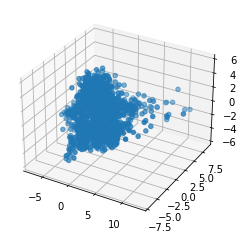

In [12]:
#Plot reduced train data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(reduced_train_data[:,0], reduced_train_data[:,1], reduced_train_data[:,2])
plt.show()

In [17]:
#Classification using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, classification_report

In [15]:
knn_model = KNeighborsClassifier()
knn_model.fit(reduced_train_data, y_train)

print('Accuracy Score - Train data: {}'.format(accuracy_score(y_train, knn_model.predict(reduced_train_data))))
print('Accuracy Score - Test Data: {}'.format(accuracy_score(y_test, knn_model.predict(reduced_test_data))))

Accuracy Score - Train data: 0.8194112967382657
Accuracy Score - Test Data: 0.7240740740740741


In [18]:
print('Classification Report: {}'.format(classification_report(y_test, knn_model.predict(reduced_test_data))))

Classification Report:               precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.72      0.76      0.74        55
           2       0.81      0.80      0.80        49
           3       0.59      0.70      0.64        54
           4       0.93      0.93      0.93        61
           5       0.41      0.34      0.37        59
           6       1.00      0.96      0.98        46
           7       0.78      0.77      0.77        56
           8       0.49      0.46      0.47        59
           9       0.61      0.62      0.62        48

    accuracy                           0.72       540
   macro avg       0.73      0.73      0.73       540
weighted avg       0.72      0.72      0.72       540



**Comparing to using Support Vector Machine, KNN model return better scores for both training (82% compare to 70%) and test (72.4% compared to 70.2%)**

* **2.Create digits classification model using DT algorithm using 50-50% and 70-30% data splitting methods. Compare performances of these two models and explain impact of difference in data splitting on the performances of the model.**

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
#Split train, test data 50-50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

print('Accuracy Score - Train data: {}'.format(accuracy_score(y_train, dt_model.predict(X_train))))
print('Accuracy Score - Test Data: {}'.format(accuracy_score(y_test, dt_model.predict(X_test))))
print('Classification Report: {}'.format(classification_report(y_test, dt_model.predict(X_test))))

Accuracy Score - Train data: 1.0
Accuracy Score - Test Data: 0.8275862068965517
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90        85
           1       0.78      0.78      0.78        88
           2       0.74      0.87      0.80        85
           3       0.83      0.84      0.83        93
           4       0.83      0.76      0.79        99
           5       0.90      0.81      0.85        94
           6       0.94      0.86      0.90        79
           7       0.83      0.86      0.84        92
           8       0.75      0.71      0.73        92
           9       0.83      0.87      0.85        92

    accuracy                           0.83       899
   macro avg       0.83      0.83      0.83       899
weighted avg       0.83      0.83      0.83       899



In [21]:
#Split train, test data 70-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

print('Accuracy Score - Train data: {}'.format(accuracy_score(y_train, dt_model.predict(X_train))))
print('Accuracy Score - Test Data: {}'.format(accuracy_score(y_test, dt_model.predict(X_test))))
print('Classification Report: {}'.format(classification_report(y_test, dt_model.predict(X_test))))

Accuracy Score - Train data: 1.0
Accuracy Score - Test Data: 0.837037037037037
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.87      0.75      0.80        55
           2       0.72      0.88      0.79        49
           3       0.85      0.87      0.86        54
           4       0.85      0.82      0.83        61
           5       0.93      0.86      0.89        59
           6       0.88      0.91      0.89        46
           7       0.76      0.91      0.83        56
           8       0.77      0.69      0.73        59
           9       0.80      0.73      0.76        48

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.84      0.84       540



**The results for both data split 70-30 and 50-50 are pretty the same.**